We have a group of 2D points, for ecample group A, contains 50 data points. We have another point B (or another group of points), that we want to find n points in A that are cloest to the point in B. How do we do that? The simplest thinking is that, we can calculate the distances of all the points from A to B and decide which are the cloest n points. 

But wait a minute, this sounds we need to do a lot of work. For example, if we want to find the 1 cloest countries from US, do we need to calculate all the countries in southern hemisphere? Are there any good ways that we don't need to calculate all the distances? Yes, there is a way! This is what I want to show this week - [K-D tree](https://en.wikipedia.org/wiki/K-d_tree). I won't go to details of this algorithm, if you are interested, you can find the intuition [here](https://www.quora.com/What-is-the-intuition-behind-KDTrees). 

I will use a python example to show how easy to use K-D tree to do the job. 

In [1]:
from scipy import spatial
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('seaborn-poster')

Let's first generate 50 x and y points in group A and for simplicity, generate one point in group B. We will calculate the 3 cloest data points from A to B. 

In [2]:
np.random.seed(100)
A = np.random.random((50,2))*100

B = [50, 50]

We first build the K-D tree using the function in scipy. And query the 3 cloest points to B. Note that, the distance here is the Euclid distance. 

In [3]:
# we use cKDTree instead of KDTree, since it is a C version, will be faster. 
kdtree = spatial.cKDTree(A)

# it returns the distance and the index of the points, 3 means we want the top 3 cloest points
dist, ix = kdtree.query(B, 3)

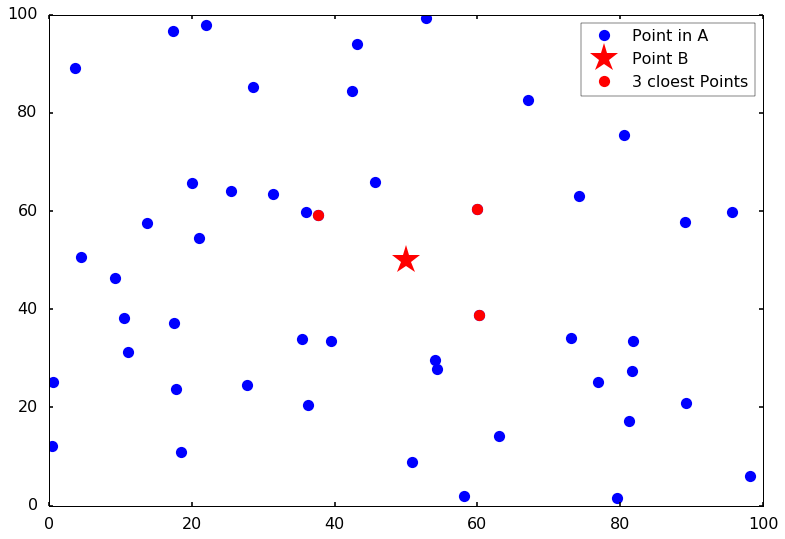

In [4]:
plt.plot(A[:, 0], A[:, 1], 'o', label = 'Point in A')
plt.plot(B[0], B[1], 'r*', markersize = 30, label = 'Point B')
plt.plot(A[:, 0][ix], A[:, 1][ix], 'ro', label = '3 cloest Points')
plt.legend(numpoints = 1)
plt.show()

## Find all points within certain distance

We can also ask the questoin: 'what are the points within distance 20 from B'. Here is how we do it:

In [5]:
# let's find all the points within distance 20 from point B
ix_list = kdtree.query_ball_point(B, 20)

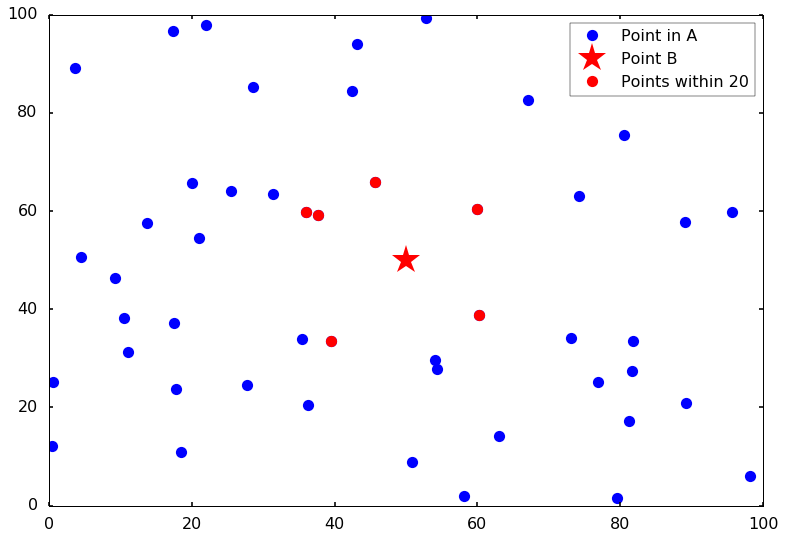

In [6]:
plt.plot(A[:, 0], A[:, 1], 'o', label = 'Point in A')
plt.plot(B[0], B[1], 'r*', markersize = 30, label = 'Point B')
plt.plot(A[:, 0][ix_list], A[:, 1][ix_list], 'ro', label = 'Points within 20')
plt.legend(numpoints = 1)
plt.show()

## Find all pairs within certain distance

If you have another group of points, you can find all the points in one group within distance 10 from another group. I will just use group A to itself, basically, we will find all the pairs of data points that has distance within 10. You can see that for each point, itself is included in the returned index, because the distance is 0. 

In [7]:
kdtree.query_ball_tree(kdtree, 10)

[[0, 45],
 [1, 10],
 [2],
 [3],
 [4, 22],
 [5, 8, 9],
 [6],
 [7, 36],
 [5, 8, 23],
 [5, 9, 11, 23],
 [1, 10],
 [9, 11, 23, 38],
 [12, 16, 46],
 [13],
 [14],
 [15],
 [12, 16, 39, 46],
 [17],
 [18],
 [19, 37],
 [20],
 [21, 40],
 [4, 22],
 [8, 9, 11, 23, 38],
 [24],
 [25, 32],
 [26, 30, 44],
 [27, 42],
 [28, 35],
 [29, 39],
 [26, 30, 44],
 [31],
 [25, 32],
 [33],
 [34, 35],
 [28, 34, 35],
 [7, 36],
 [19, 37],
 [11, 23, 38],
 [16, 29, 39],
 [21, 40],
 [41],
 [27, 42],
 [43],
 [26, 30, 44, 48],
 [0, 45],
 [12, 16, 46],
 [47],
 [44, 48, 49],
 [48, 49]]